# Diabetes Prediction

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
# importing the data
data=pd.read_csv("Downloads/diabetes_prediction_dataset.csv")

In [4]:
#view top 5 rows
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
# view the dimensions of the dataset
data.shape

(768, 9)

In [6]:
# view dataframe summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# view descriptive statistics 
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
# Checking for null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 0, 'Pregnancies')

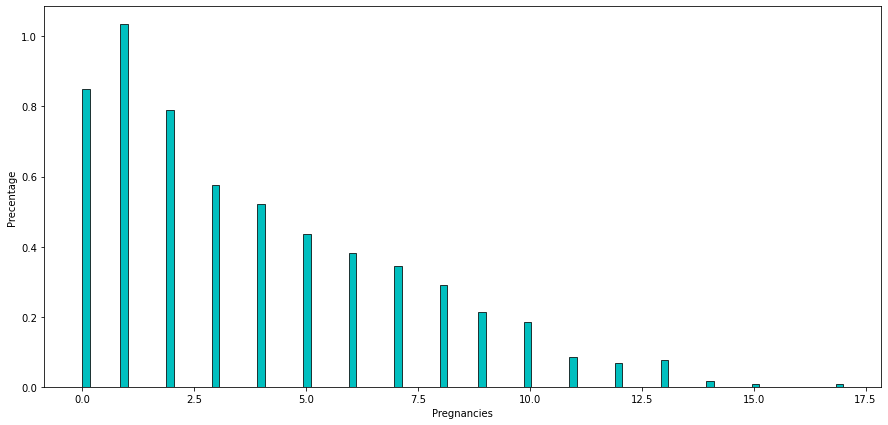

In [10]:
# Pregnancies EDA
plt.figure(figsize=(15,7))
sns.histplot(data['Pregnancies'], facecolor='c',bins=100,stat='density')
plt.ylabel('Precentage')
plt.xlabel('Pregnancies')

Text(0.5, 0, 'Glucose')

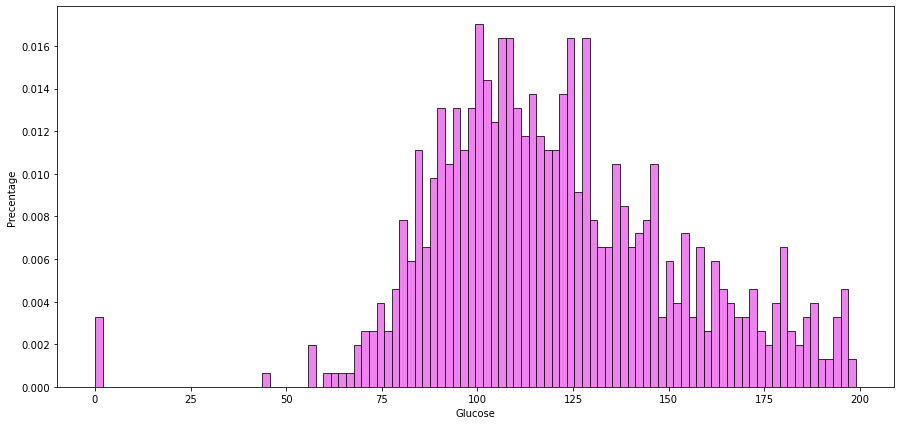

In [11]:
# Glucose EDA
plt.figure(figsize=(15,7))
sns.histplot(data['Glucose'], facecolor='violet',bins=100,stat='density')
plt.ylabel('Precentage')
plt.xlabel('Glucose')

Text(0.5, 0, 'BloodPressure')

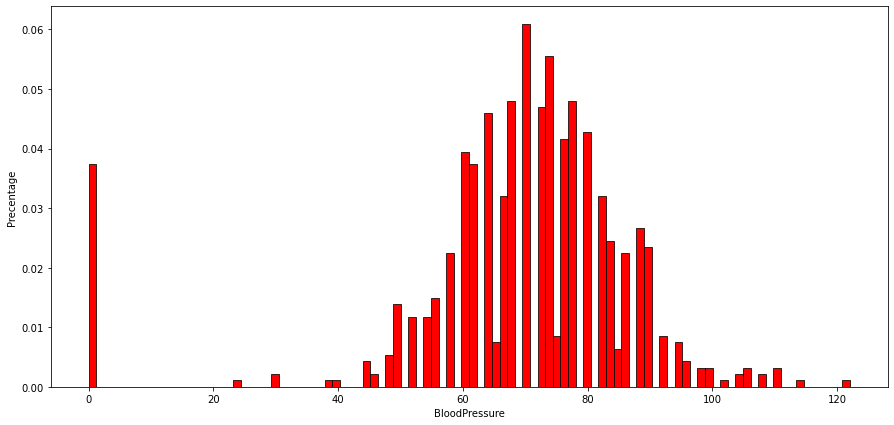

In [13]:
# Blood Pressure EDA
plt.figure(figsize=(15,7))
sns.histplot(data['BloodPressure'], facecolor='red',bins=100,stat='density')
plt.ylabel('Precentage')
plt.xlabel('BloodPressure')

Text(0.5, 0, 'SkinThickness')

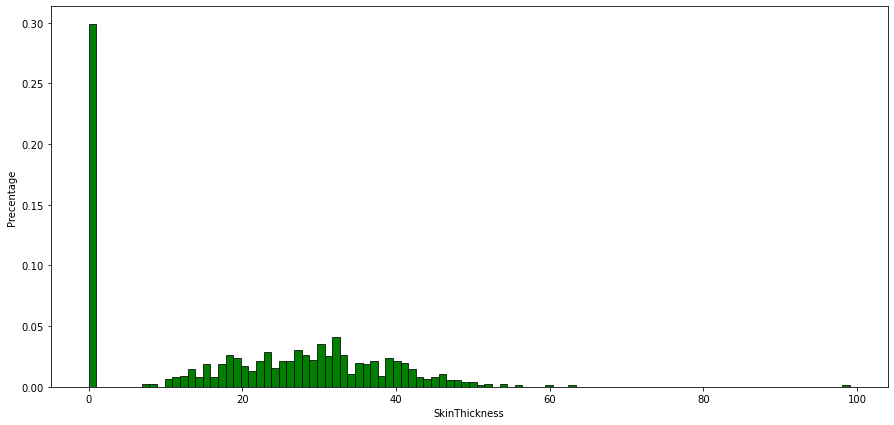

In [14]:
# Skin Thickness EDA
plt.figure(figsize=(15,7))
sns.histplot(data['SkinThickness'], facecolor='green',bins=100,stat='density')
plt.ylabel('Precentage')
plt.xlabel('SkinThickness')

Text(0.5, 0, 'BMI')

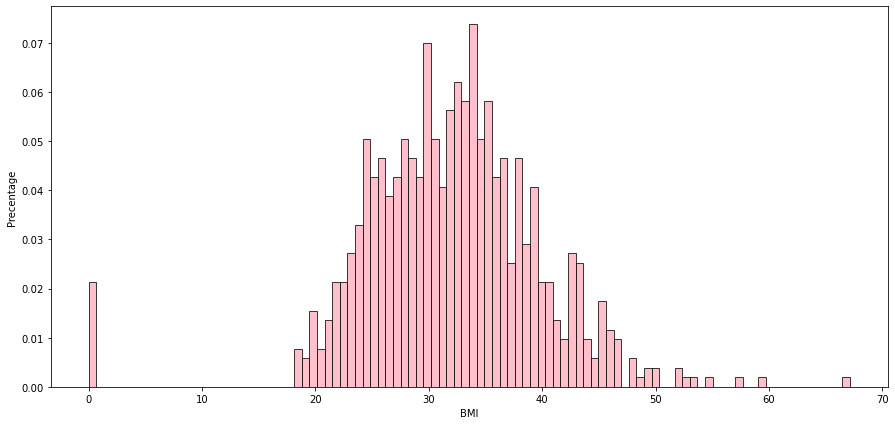

In [15]:
#BMI EDA
plt.figure(figsize=(15,7))
sns.histplot(data['BMI'], facecolor='pink',bins=100,stat='density')
plt.ylabel('Precentage')
plt.xlabel('BMI')

Text(0.5, 0, 'DiabetesPedigreeFunction')

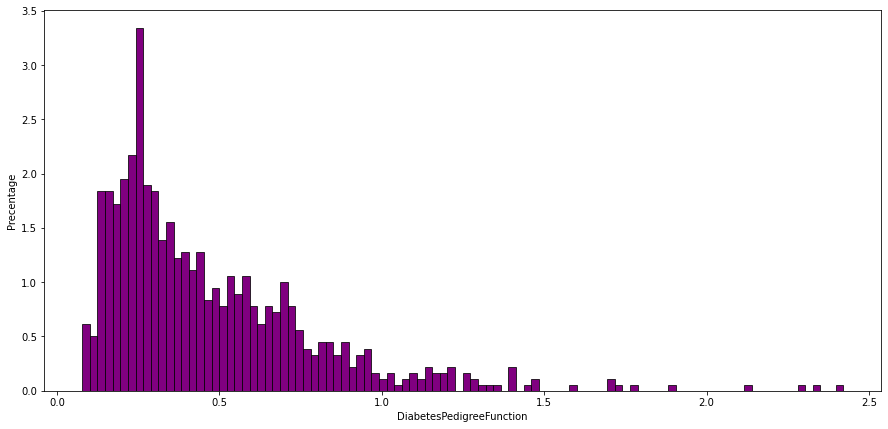

In [16]:
# Diabetes Pedigree Function EDA
plt.figure(figsize=(15,7))
sns.histplot(data['DiabetesPedigreeFunction'], facecolor='purple',bins=100,stat='density')
plt.ylabel('Precentage')
plt.xlabel('DiabetesPedigreeFunction')

array([<AxesSubplot:ylabel='Outcome'>], dtype=object)

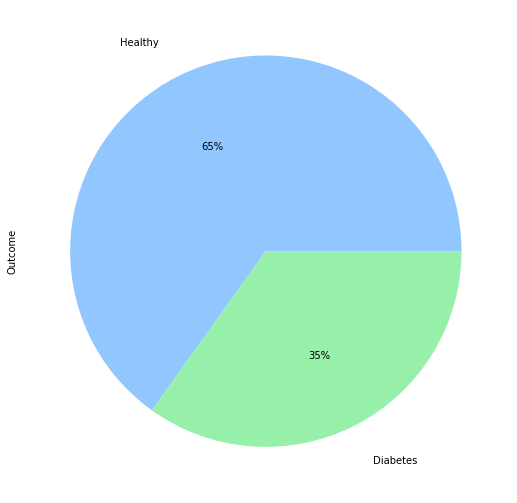

In [17]:
import matplotlib.style as style
style.available
style.use('seaborn-pastel')
labels=['Healthy','Diabetes']
data['Outcome'].value_counts().plot(kind='pie',labels=labels,subplots=True,autopct='%1.0f%%',labeldistance=1.2,figsize=(9,9))

Samples of diabetes people: 268
Samples of healthy people:  500


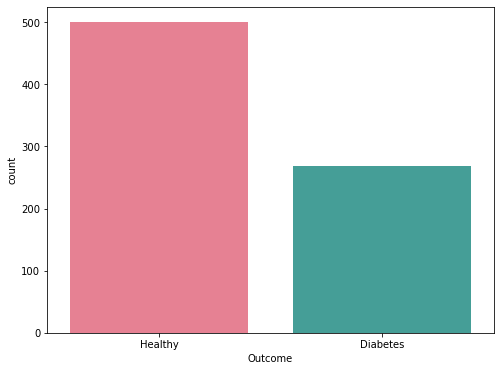

In [18]:
from matplotlib.pyplot import figure,show
figure(figsize=(8,6))
ax=sns.countplot(x=data['Outcome'],data=data,palette='husl')
ax.set_xticklabels(['Healthy','Diabetes'])
healthy,diabetes=data['Outcome'].value_counts().values
print('Samples of diabetes people:',diabetes)
print('Samples of healthy people: ',healthy)

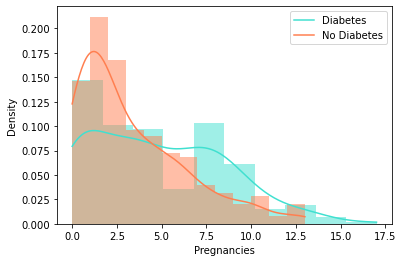

In [19]:
#Distribution of other featured with respect to Outcome
plt.figure()
ax=sns.histplot(data['Pregnancies'][data.Outcome==1],color='turquoise',kde=True,stat='density',edgecolor='none')
sns.histplot(data['Pregnancies'][data.Outcome==0],color='coral',kde='True',stat='density',edgecolor='none')
plt.legend(['Diabetes','No Diabetes'])

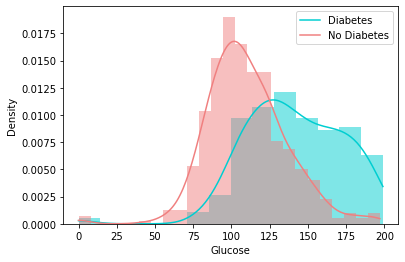

In [20]:
plt.figure()
ax=sns.histplot(data['Glucose'][data.Outcome==1],color='darkturquoise',kde=True,stat='density',edgecolor='none')
sns.histplot(data['Glucose'][data.Outcome==0],color='lightcoral',kde='True',stat='density',edgecolor='none')
plt.legend(['Diabetes','No Diabetes'])

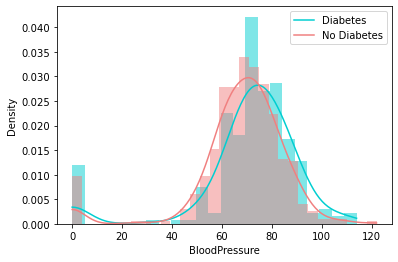

In [21]:
plt.figure()
ax=sns.histplot(data['BloodPressure'][data.Outcome==1],color='darkturquoise',kde=True,stat='density',edgecolor='none')
sns.histplot(data['BloodPressure'][data.Outcome==0],color='lightcoral',kde='True',stat='density',edgecolor='none')
plt.legend(['Diabetes','No Diabetes'])

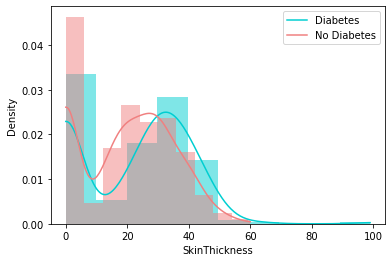

In [22]:
plt.figure()
ax=sns.histplot(data['SkinThickness'][data.Outcome==1],color='darkturquoise',kde=True,stat='density',edgecolor='none')
sns.histplot(data['SkinThickness'][data.Outcome==0],color='lightcoral',kde='True',stat='density',edgecolor='none')
plt.legend(['Diabetes','No Diabetes'])

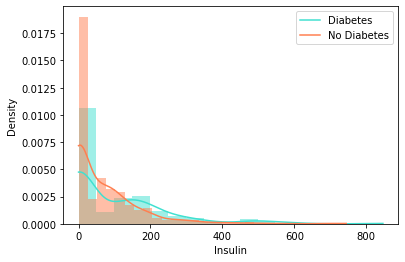

In [24]:
plt.figure()
ax=sns.histplot(data['Insulin'][data.Outcome==1],color='turquoise',kde=True,stat='density',edgecolor='none')
sns.histplot(data['Insulin'][data.Outcome==0],color='coral',kde='True',stat='density',edgecolor='none')
plt.legend(['Diabetes','No Diabetes'])

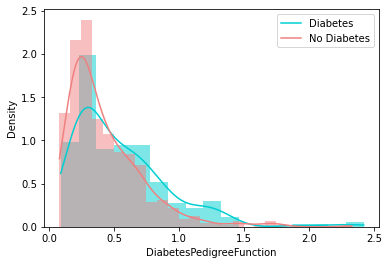

In [25]:
plt.figure()
ax=sns.histplot(data['DiabetesPedigreeFunction'][data.Outcome==1],color='darkturquoise',kde=True,stat='density',edgecolor='none')
sns.histplot(data['DiabetesPedigreeFunction'][data.Outcome==0],color='lightcoral',kde='True',stat='density',edgecolor='none')
plt.legend(['Diabetes','No Diabetes'])

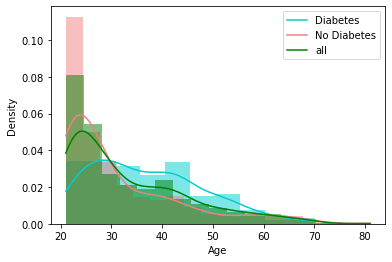

In [26]:
plt.figure()
ax=sns.histplot(data['Age'][data.Outcome==1],color='darkturquoise',kde=True,stat='density',edgecolor='none')
sns.histplot(data['Age'][data.Outcome==0],color='lightcoral',kde='True',stat='density',edgecolor='none')
sns.histplot(data['Age'],color='green',kde=True,stat='density',linewidth=0)
plt.legend(['Diabetes','No Diabetes','all'])

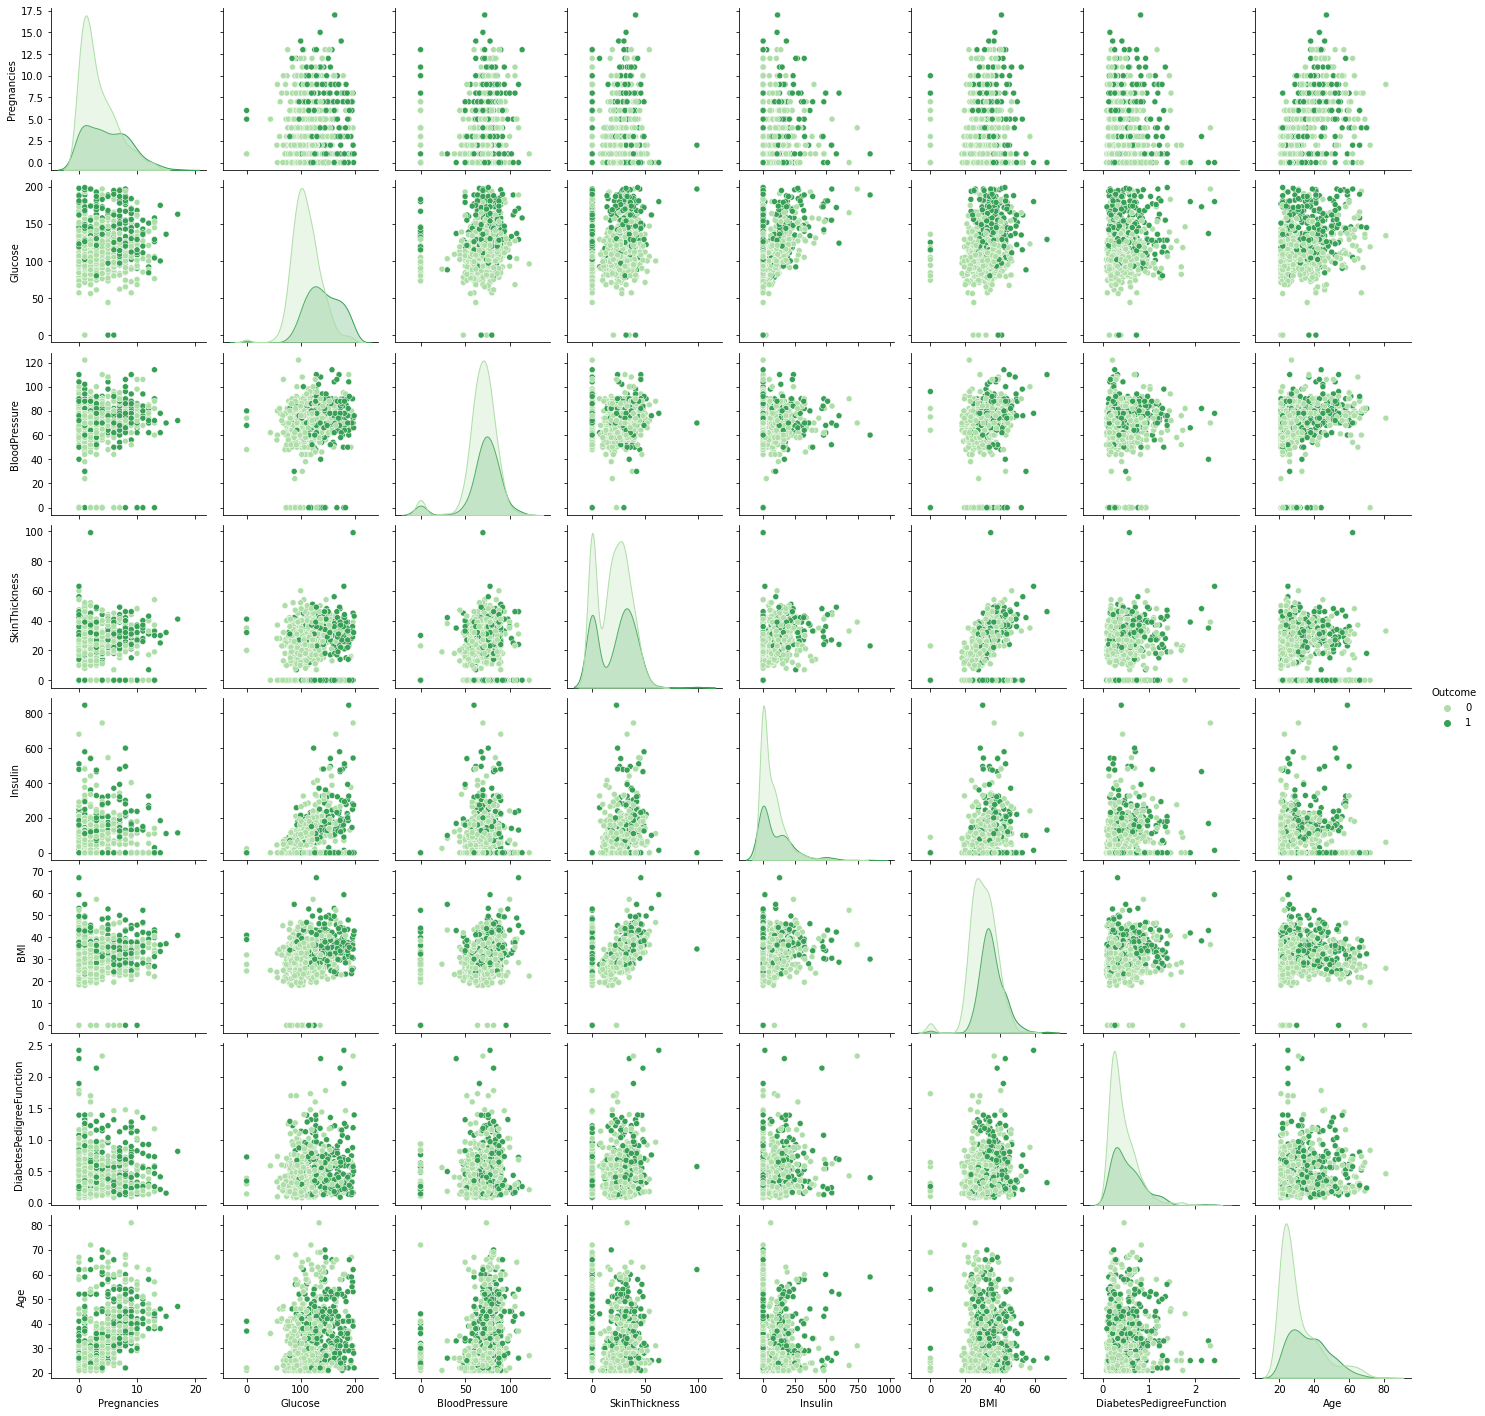

In [28]:
# pairplot
sns.pairplot(data,hue='Outcome',palette='Greens')

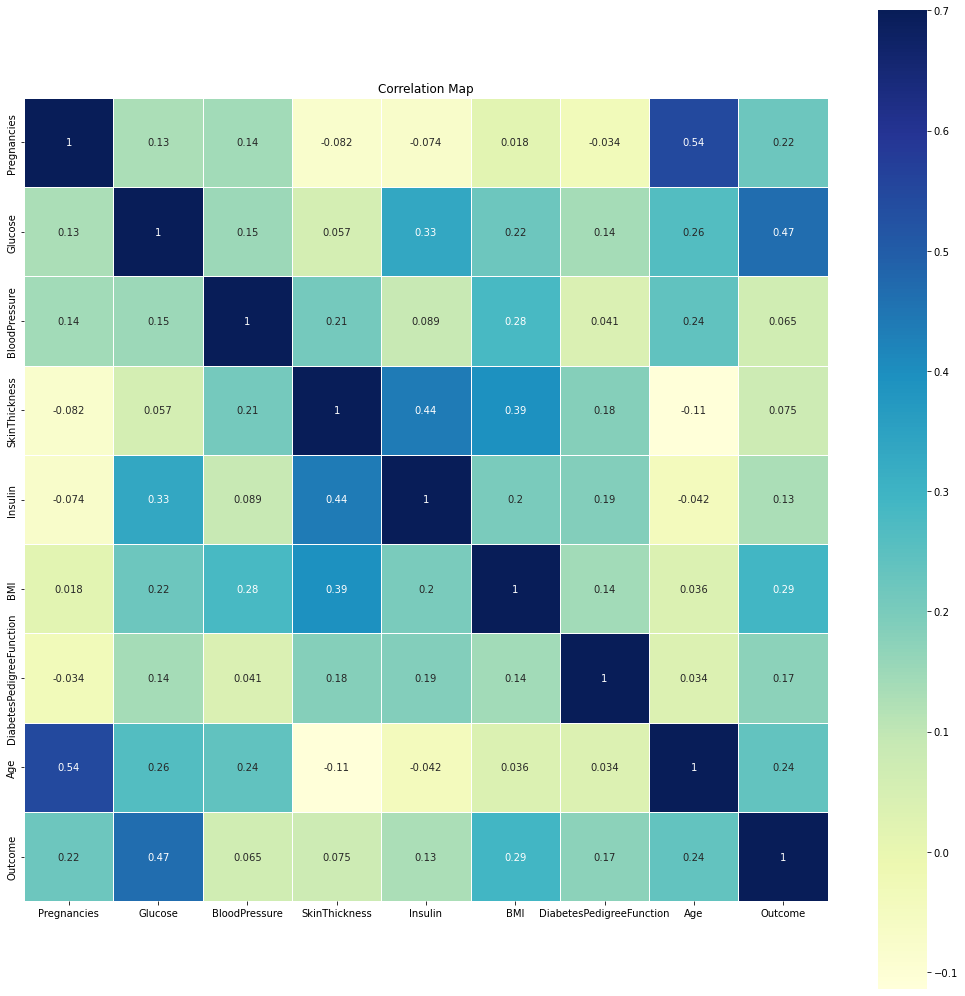

In [29]:
# Finding Correlation between the columns
matrix=data.corr()
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(matrix,vmax=.7,square=True,cmap='YlGnBu',annot=True,linewidth=.5).set_title('Correlation Map');

In [30]:
# Checking for values which are 0
print('Total number of rows in the dataset:',len(data))
print('Total number of rows in the Glucose which are zero:',len(data.loc[data['Glucose']==0]))
print('Total number of rows in the Blood Pressure which are zero:',len(data.loc[data['BloodPressure']==0]))
print('Total number of rows in the Skin Thickness which are zero:',len(data.loc[data['SkinThickness']==0]))
print('Total number of rows in the Insulin which are zero:',len(data.loc[data['Insulin']==0]))
print('Total number of rows in the BMI which are zero:',len(data.loc[data['BMI']==0]))
print('Total number of rows in the DiabetesPedigreeFunction which are zero:',len(data.loc[data['DiabetesPedigreeFunction']==0]))
print('Total number of rows in the Age which are zero:',len(data.loc[data['Age']==0]))

Total number of rows in the dataset: 768
Total number of rows in the Glucose which are zero: 5
Total number of rows in the Blood Pressure which are zero: 35
Total number of rows in the Skin Thickness which are zero: 227
Total number of rows in the Insulin which are zero: 374
Total number of rows in the BMI which are zero: 11
Total number of rows in the DiabetesPedigreeFunction which are zero: 0
Total number of rows in the Age which are zero: 0


In [36]:
# separating last column i.e outcomes from the dataset and assigning to different variables
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [37]:
data.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [38]:
#separating data and labels
x=data.drop(columns='Outcome',axis=1)
y=data['Outcome']

In [39]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [40]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [41]:
# Data Standardisation
scaler=StandardScaler()
scaler.fit(x)

StandardScaler()

In [42]:
standardised_data=scaler.transform(x)
print(standardised_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [43]:
x=standardised_data
y=data['Outcome']
print(x)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [44]:
# splitting data into train data and test data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.3, stratify=y,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (537, 8) (231, 8)


In [45]:
#Training the model
classifier = svm.SVC(kernel='linear')

In [46]:
#training the support vector Machine Classifier
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [47]:
# Accuracy score on the training data
x_train_prediction = classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [48]:
print('Accuracy score of the training data:',training_data_accuracy)

Accuracy score of the training data: 0.7821229050279329


In [49]:
# Accuracy score on the test data
x_test_prediction = classifier.predict(x_test)
training_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [50]:
print('Accuracy score of the test data:',training_data_accuracy)

Accuracy score of the test data: 0.7748917748917749


In [51]:
# Making a predictive system
input_data=(1,103,30,38,83,43.3,0.183,33) #giving input from dataset and checking whether the prediction is right or wrong

input_data_as_numpy_array=np.asarray(input_data) #changing the input data to numpy array

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1) # reshaping the array as we are predicting only for one instance

std_data=scaler.transform(input_data_reshaped) # standardising the input data
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0]==0):
    print('The person is NOT DIABETIC')
else:
    print('The person is DIABETIC')

[[-0.84488505 -0.56004775 -2.02166474  1.09545411  0.02778979  1.43512945
  -0.87244072 -0.0204964 ]]
[0]
The person is NOT DIABETIC


In [55]:
# represents a linear stack of layers
from keras.models import Sequential
# fully connected layer
from keras.layers import Dense

# Model Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score, f1_score
import pickle

In [57]:
# Normality Test
from scipy import stats
## retrieving p value from normality test function
PregnanciesPVAL=stats.normaltest(data.Pregnancies).pvalue
GlucosePVAL=stats.normaltest(data.Glucose).pvalue
BloodPressurePVAL=stats.normaltest(data.BloodPressure).pvalue
SkinThicknessPVAL=stats.normaltest(data.SkinThickness).pvalue
InsulinPVAL=stats.normaltest(data.Insulin).pvalue
BMIPVAL=stats.normaltest(data.BMI).pvalue
diaPeFuPVAL=stats.normaltest(data.DiabetesPedigreeFunction).pvalue
AgePVAL=stats.normaltest(data.Age).pvalue
## Printing the values
print("Pregnancies P Value is " + str(PregnanciesPVAL))
print("Glucose P Value is " + str(GlucosePVAL))
print("BloodPressure P Value is " + str(BloodPressurePVAL))
print("Skin Thickness P Value is " + str(SkinThicknessPVAL))
print("Insulin P Value is " + str(InsulinPVAL))
print("BMI P Value is " + str(BMIPVAL))
print("dfbetes Pedigree Function P Value is " + str(diaPeFuPVAL))
print("Age P Value is " + str(AgePVAL))

Pregnancies P Value is 3.9142916387836715e-18
Glucose P Value is 0.0020446506991363502
BloodPressure P Value is 3.780127075543807e-67
Skin Thickness P Value is 0.00017124157678801767
Insulin P Value is 6.895342740914799e-85
BMI P Value is 1.9696869549260572e-19
dfbetes Pedigree Function P Value is 1.2987697487612696e-70
Age P Value is 9.308980038236578e-27


### Inference:
None of the variables are normal. (P>0.05)

The variables "Pregnancies," "Glucose," "Insulin," "BMI," "Diabetes Pedigree Function," and "Age" show strong evidence of association with the outcome variable based on their small p-values.
The variables "Blood Pressure" and "Skin Thickness" also show some evidence of association, although the evidence may not be as strong.

In [59]:
textd = ['non-diabetic' if cl==0 else 'diabetic' for cl in data['Outcome']]

fig = go.Figure(data=go.Splom(
                  dimensions=[dict(label='Pregnancies', values=data['Pregnancies']),
                              dict(label='Glucose', values=data['Glucose']),
                              dict(label='BloodPressure', values=data['BloodPressure']),
                              dict(label='SkinThickness', values=data['SkinThickness']),
                              dict(label='Insulin', values=data['Insulin']),
                              dict(label='BMI', values=data['BMI']),
                              dict(label='DiabPedigreeFun', values=data['DiabetesPedigreeFunction']),
                              dict(label='Age', values=data['Age'])],
                  showupperhalf=False,# remove plots on diagonal
                  marker=dict(color=data['Outcome'],
                              size=5,
                              colorscale='Viridis',
                              line=dict(width=0.5,
                                        color='rgb(230,230,230)')),
                  text=textd))
                  #diagonal=dict(visible=False)))

title = "Scatterplot Matrix for Diabetes Dataset"
fig.update_layout(title=title,
                  template = 'plotly_white',
                  dragmode='select',
                  width=1000,
                  height=1000,
                  hovermode='closest')

fig.show()